# Régression Logistique

On considère un jeu de données avec : 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [88]:
n = 100
x, y = make_classification(n_samples=n, n_features=2, 
                           n_redundant=0, n_informative=2,
                           n_repeated=0, random_state=0, class_sep=1)

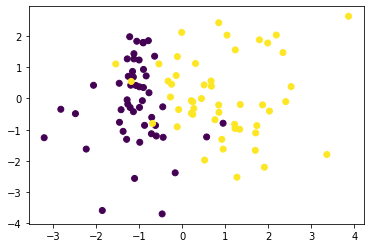

In [89]:
plt.scatter(x[:, 0], x[:, 1], c=y);

On crée une colonne de biais :

In [90]:
X = np.concatenate((x, np.ones((n, 1))), axis=1)

## Fonction Heaviside

 Un exemple de fonction d'activation est la fonction de Heaviside, qui renvoie tout le temps 1 si le signal en entrée est positif, ou 0 s'il est négatif.

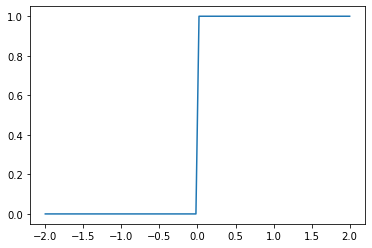

In [104]:
def heaviside(x):
    return x > 0

z = np.linspace(-2, 2, 100)

plt.plot(z, heaviside(z));

In [105]:
def model(X, beta):
    f = X.dot(beta)
    return f > 0

In [120]:
def cost_function(X, beta, y):
    return np.sum((model(X, beta) - y)**2)

In [107]:
beta = np.random.randn(3)
cost_function(X, beta, y)

62

In [108]:
def plot_graph(X, y, figsize=(12,7)):
    plt.figure(figsize=figsize)
    ax1 = plt.subplot(121)
    ax1.scatter(X[:, 0], X[:, 1], c=y)

    ax2 = plt.subplot(122)
    ax2.scatter(X[:, 0], X[:, 1], c=y)
    ax2.plot(x0, x1, c='red')
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_ylim(ax1.get_ylim());

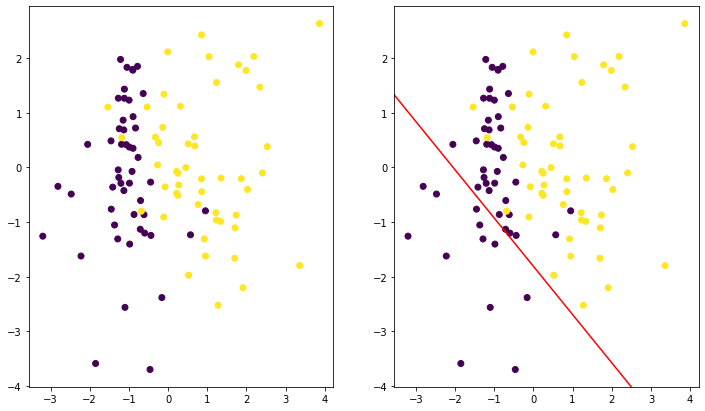

In [109]:
y_pred = model(X, beta)

x0 = np.linspace(-10, 10, 100)
x1 = - (beta[0] * x0 + beta[2]) / beta[1]

plot_graph(X, y)

On peut ensuite utiliser une descente de gradient sur notre modèle : 

In [110]:
def gradient_descent(X, beta, y, n_iterations=1000, learning_rate=0.01):
    for n in range(n_iterations):
        beta = beta - learning_rate * (model(X, beta) - y).dot(X)
    return beta

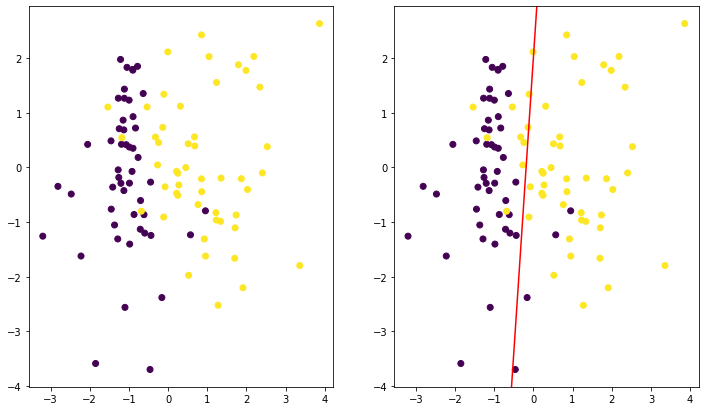

In [111]:
beta_find = gradient_descent(X, beta, y)

x0 = np.linspace(-10, 10, 100)
x1 = - (beta_find[0] * x0 + beta_find[2]) / beta_find[1]

plot_graph(X, y)

In [112]:
cost_function(X, beta_find, y)

14

## Utilisation de la fonction Logit

Dans le cas de la régression logistique la fonction de lien est la fonction $\text{logit}$

$$\text{logit}\; (x) = \frac{1}{1+ e^{\, -x}}$$

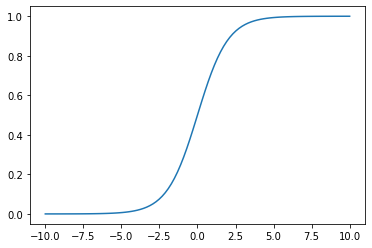

In [114]:
z = np.linspace(-10, 10, 100)

def logit(x):
    return 1 / (1 + np.exp(-x))

plt.plot(z, logit(z));

In [123]:
def model(X, beta):
    f = X.dot(beta)
    return logit(f)


def cost_function(X, beta, y):
    n = len(y)
    p = model(X, beta)
    return -1 / n * np.sum(y*np.log(p) + (1-y)*np.log(1-p))


def gradient(X, beta, y):
    n = len(y)
    return 1/n * X.T.dot(model(X, beta) - y)


def gradient_descent_2(X, beta, y, n_iterations=1000, learning_rate=0.01):
    for n in range(n_iterations):
        beta = beta - learning_rate * gradient(X, beta, y)
    return beta


def prediction(X, beta, threshold=0.5):
    return model(X, beta) >= threshold

In [116]:
beta = np.random.randn(3)

In [121]:
cost_function(X, beta, y)

43.20020885286953

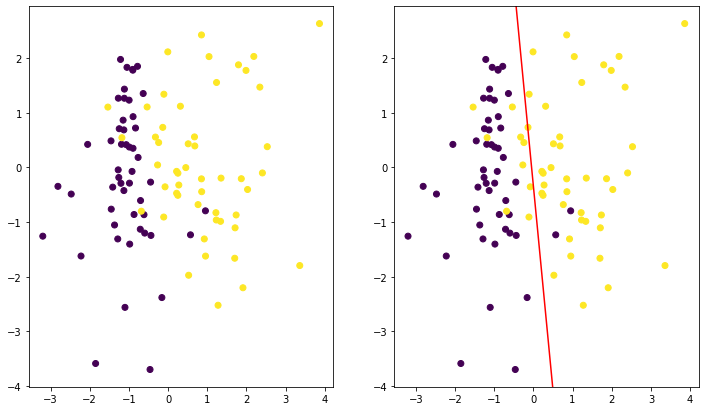

In [117]:
beta_final_2 = gradient_descent_2(X, beta, y)
y_pred = prediction(X, beta_final_2)

x0 = np.linspace(-2, 2, 100)
x1 = - (beta_final_2[0] * x0 + beta_final_2[2]) / beta_final_2[1]

plt.figure(figsize=(12, 7))
ax1 = plt.subplot(121)
ax1.scatter(X[:, 0], X[:, 1], c=y)

ax2 = plt.subplot(122)
ax2.scatter(X[:, 0], X[:, 1], c=y)
ax2.plot(x0, x1, c='red')
ax2.set_xlim(ax1.get_xlim())
ax2.set_ylim(ax1.get_ylim());

In [122]:
cost_function(X, beta_final, y)

10.21360409856597